In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from skimage import io

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_columns = ['bbox_left', 'bbox_top', 'bbox_width', 'bbox_height', 'score', 'object_category', 'truncation', 'occlusion']

def get_data(data_dir, idx):
    # Load annotation
    annotation_dir = os.path.join(data_dir, 'annotations')
    annotation_files = os.listdir(annotation_dir)
    annotation_file = annotation_files[idx]
    annotation_path = os.path.join(annotation_dir, annotation_file)
    
    annotations = pd.read_csv(annotation_path, names=csv_columns)
    
    # Load image
    file_basename, _ = os.path.splitext(annotation_file)
    image_file = file_basename + '.jpg'
    image_dir = os.path.join(data_dir, 'images')
    image_path = os.path.join(image_dir, image_file)
    
    image = io.imread(image_path)
    
    return image, annotations

In [3]:
object_categories = [
    'ignored regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others'
]

palette = sns.color_palette('bright', len(object_categories))

def vis_bbox(image, annotations, figsize=(16, 16)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    
    # Show image
    ax.imshow(image)
    
    # Draw bbox
    for _, obj in annotations.iterrows():
        x, y = obj['bbox_left'], obj['bbox_top']
        h, w = obj['bbox_height'], obj['bbox_width']
        
        cat_id = obj['object_category']
        color = palette[cat_id]
        ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor=color, linewidth=3, alpha=1))
        
        cat = object_categories[cat_id]
        ax.text(
            x, y, cat, style='italic', color='white', fontsize=10, fontweight='semibold',
            bbox={'edgecolor':color, 'facecolor': color, 'alpha': 1, 'pad': 0}
        )

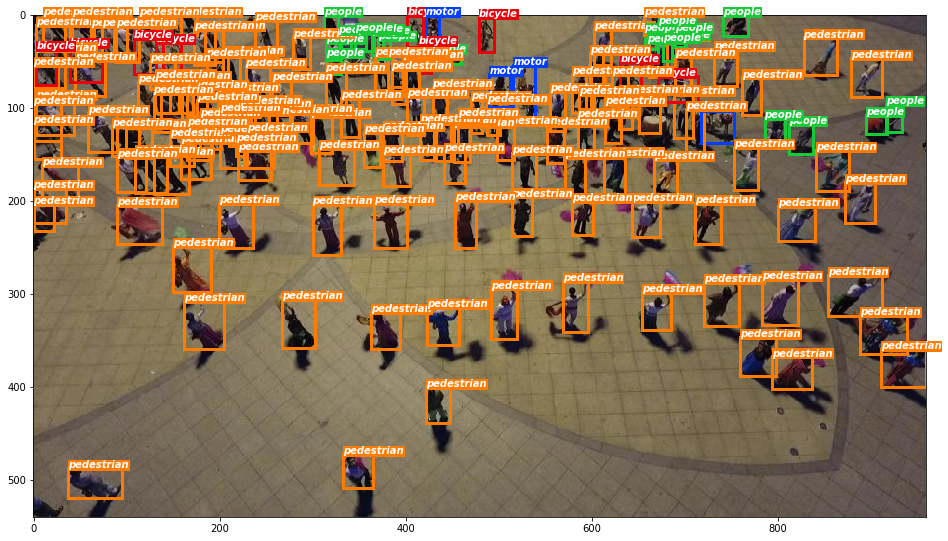

In [4]:
image, annotations = get_data('data/VisDrone2018-DET-train', 20)
vis_bbox(image, annotations)

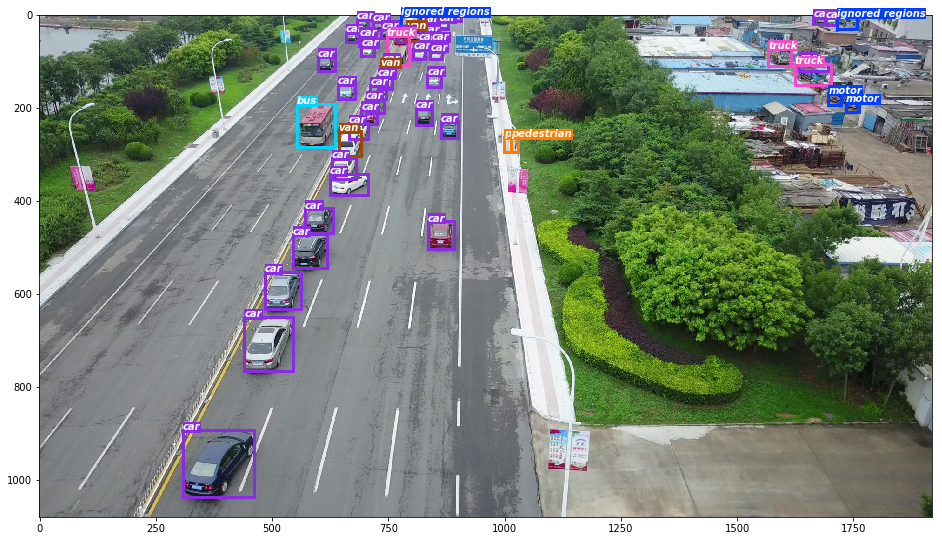

In [5]:
image, annotations = get_data('data/VisDrone2018-DET-train', 555)
vis_bbox(image, annotations)

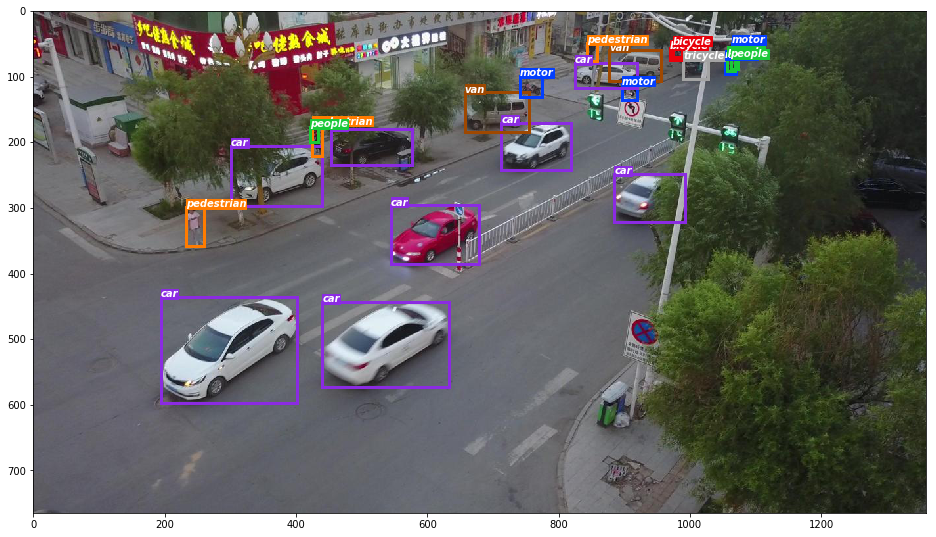

In [6]:
image, annotations = get_data('data/VisDrone2018-DET-train', 1060)
vis_bbox(image, annotations)